<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
        <span><br><font size=3></font></span>
        <span><br><font size=3></font></span>
        <span><br><font size=6>Sepehr Karimi Arpanahi</font></span>
        <span><br><font size=3>810100447</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 2</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mersad.esalati@gmail.com">Mersad Esalati</a><br></font><br>
    </div>
</div>

# Beatifulsoup

## News Crawler
News Information:
- Title
- Description
- datetime
- Category
- Agency

<div dir = "rtl">
در این سوال می خواهیم با استفاده از کتابخانه
beautifulsoup
داده های مورد نظرمان را از سایت 
tgju
استخراج کنیم.

در این سوال داده های خواسته شده از ما، اخبار مربوط به طلا و سکه و اخبار ارزی سایت می باشند. همچنین حداقل ۵۰۰ خبر از هر کدام از ارشیو ها باید استخراج کنیم.

پس ابتدا کتابخانه های مورد نیاز را فراخوانی میکنیم:
</div>

In [14]:
from bs4 import BeautifulSoup
from csv import writer
import requests 


### Currency News Crawler

<div dir = "rtl">
در بخش اول داده های ارشیو اخبار ارزی را 
crawl
می کنیم و در آخر در فایل 
currency_news.csv
ذخیره می کنیم.

با توجه به اینکه در هر صفحه از سایت ۲۰ خبر موجود است. داده های ۲۵ صفحه اول سایت را 
crawl
خواهیم کرد. پس در یک حلقه تا زمانی که تعداد اخبار کمتر از ۵۰۱ باشد، ابتدا URL مورد نیازمان را 
request میکنیم و پاسخ را در
response
ذخیره می کنیم.
در ادامه 
response 
را به تابع
beautifulsoup
داده و در soup ذخیره میکنیم.
حال ستون های title ، description ، datetime ، category و agency را استخراج می کنیم.
سپس داده های جمع آوری شده را در فایل
currency_news.csv
ذخیره می کنیم.

agency:
برای به دست آوردن اطلاعات خبرگزاری برای هر خبر، از آنایی که ممکن است برخی اخبار سایت بدون منبع(خبر های تحریریه همین سایت) باشند، ما درصورتی که agency موجود نباشد برای آن خبر ، "-" یادداشت می کنیم.
</div>

In [37]:
with open('currency_news.csv', 'w', encoding='utf8', newline='') as f:
    thewriter = writer(f)
    header = ['category', 'agency', 'title', 'description','time']
    thewriter.writerow(header)

    i = 1 # of page we are crawling
    n = 0 # Number of news
    while n < 501: 

        url = "https://www.tgju.org/news/category/93965/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%A7%D8%B1%D8%B2%DB%8C/page/{}".format(i)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        lists = soup.find_all("div", {"class": "news-article-block"})
        i = i+1
        n = n + len(lists)
        
        for list in lists:
            category = list.find("a", {"class": "news-article-tag outline-tag"}).text
            if list.find("span", {"class": "news-article-tag"}) is None:
                agency = " - "
            else:
                agency = list.find("span", {"class": "news-article-tag"}).text
            
            title = list.find("h2", {"class": "news-article-title font-title-18"}).text.replace('\n', '')
            description = list.find("span", {"class": "news-article-description"}).text.replace('\n', '')
            time = list.find("time", {"class": "news-article-text-sub"})["datetime"]

            info = [category, agency, title, description,time]
            thewriter.writerow(info)
            


### Gold News Crawler

<div dir="rtl">
در اینجا نیز همان کد مرحله قبل را برای اخبار سکه و طلا اجرا می کنیم و در انتها نیز آن را در فایل
gold_news.csv
ذخیره میکنیم.
</div>

In [39]:
with open('gold_news.csv', 'w', encoding='utf8', newline='') as f:
    thewriter = writer(f)
    header = ['category', 'agency', 'title', 'description','time']
    thewriter.writerow(header)

    i = 1 # of page we are crawling
    n = 0 # Number of news
    while n < 501: 

        url = "https://www.tgju.org/news/category/93964/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%B7%D9%84%D8%A7-%D9%88-%D8%B3%DA%A9%D9%87/page/{}".format(i)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        lists = soup.find_all("div", {"class": "news-article-block"})

        n = n + len(lists)
        i = i+1
        for list in lists:
            category = list.find("a", {"class": "news-article-tag outline-tag"}).text
            if list.find("span", {"class": "news-article-tag"}) is None:
                agency = " - "
            else:
                agency = list.find("span", {"class": "news-article-tag"}).text
            
            title = list.find("h2", {"class": "news-article-title font-title-18"}).text.replace('\n', '')
            description = list.find("span", {"class": "news-article-description"}).text.replace('\n', '')
            time = list.find("time", {"class": "news-article-text-sub"})["datetime"]

            info = [category, agency, title, description,time]
            thewriter.writerow(info)

## Question 1: Top Agency

<div dir = "rtl">
سوال اول از ما می خواهد که۵ خبرگزاری که در این مدت بیشترین خبر را منتشر کردند را بدست آوریم.
پس به ازای هر کدام از دسته بندی ها، تعداد سطر ها را به ازای هر agency جمع آوری کرده و آن ها را در یک دیتافریم جدید ذخیره می کنیم.
سپس ۵ خبرگزاری که بیشتر خبر را منتشر کردند را نمایش می دهیم:
همانطور که گفته شد، خبرگزاری "-" همان خبر های تحریریه سایت tgju میباشد.
</div>

In [58]:
import pandas as pd
# Reading
df_currency = pd.read_csv("./currency_news.csv")
df_gold= pd.read_csv("./gold_news.csv")

top_5_agencies_gold = df_gold['agency'].value_counts().index[0:5].to_frame().set_axis(['top 5 Agencies'],axis=1).reset_index(drop=True)
top_5_agencies_currency = df_currency['agency'].value_counts().index[0:5].to_frame().set_axis(['top 5 Agencies'],axis=1).reset_index(drop=True)
top_5_agencies_gold.index = top_5_agencies_gold.index+1
top_5_agencies_currency.index = top_5_agencies_currency.index+1
print("Agencies with the most news in our GOLD dataset are :"  )
display (top_5_agencies_gold )
print("\nAgencies with the most news in our CURRENCY dataset are :"  )
display ( top_5_agencies_currency )

Agencies with the most news in our GOLD dataset are :


,top 5 Agencies
1,نبض بازار
2,اقتصاد نیوز
3,سایت طلا
4,اقتصاد آنلاین
5,-



Agencies with the most news in our CURRENCY dataset are :


,top 5 Agencies
1,اقتصاد نیوز
2,ایران اکونومیست
3,دنیای اقتصاد
4,دیجی کالا مگ
5,اقتصاد 24


## Question 2: Daily News Trend

<div dir = "rtl">
در سوال دوم می خواهیم نمودار trend تعداد اخبار را بر اساس هر روز و برای هر دو دسته بندی نمایش دهیم و آن ها را با هم مقایسه کنیم.
مانند قسمت قبل ابتدا فایل های csv را خوانده و در دیتافریم های
df_currency و df_gold ذخیره میکنیم.
سپس ستون time هر دو نمودار را به فرمت datetime می بریم.
در ادامه برای بدست آورن تعداد اخبار در هر روز، در هر کدام از دیتافریم ها را با استفاده از دستور group_by
تعداد اخبار را بدست می اوریم و در سری های
gold_trend و currency_trend ذخیره می کنیم.
سپس آن ها را در نمودار زیر نمایش می دهیم.
همانطور که می بینیم، تعداد اخبار مربوط به بازار سکه و طلا کمتر است به همین علت تعداد روز های بیشتری از نمودار را شامل می شود. اما چون تعداد اخبار مربوط به بازار ارز بیشتر است، تعداد روز های کمتری را در نمودار شامل می شود.
همینطور در مقایسه ترند اخبار در روز هایی که اخبار هر دو بازار را داریم، میبینیم که تغییرات نمودار تقریبا از یک شیب پیروی می کند و دو نمودار همدیگر را دنبال می کنند.

</div>

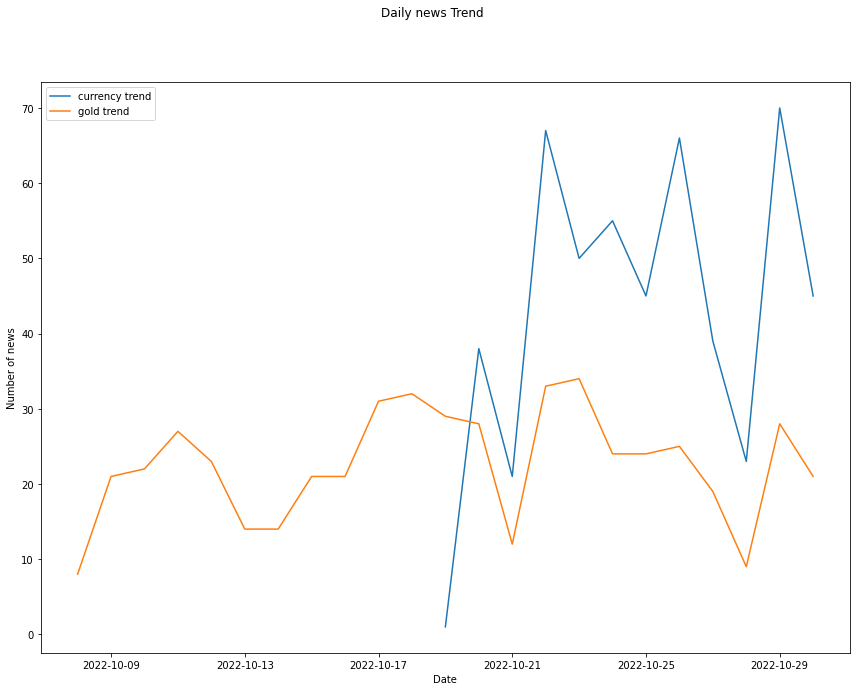

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Reading
df_currency = pd.read_csv("./currency_news.csv")
df_gold= pd.read_csv("./gold_news.csv")

df_currency['time'] = pd.to_datetime(df_currency['time'])
df_gold['time'] = pd.to_datetime(df_gold['time'])
currency_trend = df_currency.groupby([df_currency["time"].dt.date])['category'].count()
gold_trend = df_gold.groupby([df_gold["time"].dt.date])['category'].count()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14.5, 10.5)
ax.plot(currency_trend.index, currency_trend.values, label = "currency trend")
ax.plot(gold_trend.index, gold_trend.values, label = "gold trend")
fig.suptitle('Daily news Trend')
plt.xlabel('Date')
plt.ylabel('Number of news')
ax.legend()

